# import Data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("./3bura_data.csv")
data.head()

D:\Users\GL503 HERO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,9,10,11,12,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,id,DEAD_YEAR(Budha),DEAD_YEAR,Age,Sex,BirthYear,NationalityId,Tumbol,District,...,DateRec,TimeRec,AccSubDist,AccDist,AccProv,AccLat,AccLong,ICD-10,Vehicle,new_Age
0,0,8594771,2554,2011,21.0,1.0,1989.0,99.0,บึงสามพัน,บึงสามพัน,...,1/1/2011,0:25:00,บึงสามพัน,บึงสามพัน,เพชรบูรณ์,15.7941,101.007,V892,รถอื่นๆ,22.0
1,1,8594772,2554,2011,23.0,1.0,1987.0,99.0,พังกาญจน์,พนม,...,1/1/2011,6:35:00,พังกาญจน์,พนม,สุราษฎร์ธานี,8.91621,98.8904,V299,รถจักรยานยนต์,24.0
2,2,8594773,2554,2011,26.0,1.0,1984.0,99.0,จำปาโมง,บ้านผือ,...,1/1/2011,19:00:00,บ้านฉาง,บ้านฉาง,ระยอง,NaN,NaN,V234,รถจักรยานยนต์,27.0
3,3,8594774,2554,2011,16.0,1.0,1994.0,99.0,ปลักแรด,บางระกำ,...,1/1/2011,2:00:00,ปลักแรด,บางระกำ,พิษณุโลก,16.663,100.121,V429,รถยนต์,17.0
4,4,8594775,2554,2011,12.0,1.0,1998.0,99.0,ปลักแรด,บางระกำ,...,1/1/2011,2:00:00,ปลักแรด,บางระกำ,พิษณุโลก,16.663,100.121,V429,รถยนต์,13.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170841 entries, 0 to 170840
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        170841 non-null  int64  
 1   id                170841 non-null  int64  
 2   DEAD_YEAR(Budha)  170841 non-null  int64  
 3   DEAD_YEAR         170841 non-null  int64  
 4   Age               170841 non-null  float64
 5   Sex               167543 non-null  float64
 6   BirthYear         141883 non-null  float64
 7   NationalityId     107115 non-null  float64
 8   Tumbol            25917 non-null   object 
 9   District          56999 non-null   object 
 10  Province          57105 non-null   object 
 11  RiskHelmet        3704 non-null    object 
 12  RiskSafetyBelt    1304 non-null    object 
 13  DeadDate          170841 non-null  object 
 14  DateRec           82924 non-null   object 
 15  TimeRec           82924 non-null   object 
 16  AccSubDist        81

In [6]:
data.describe()

,Unnamed: 0,id,DEAD_YEAR(Budha),DEAD_YEAR,Age,Sex,BirthYear,NationalityId,new_Age
count,170841.000000,1.708410e+05,170841.000000,170841.000000,170841.000000,167543.000000,141883.000000,107115.000000,141883.000000
mean,107206.172663,9.196428e+06,2558.582231,2015.582231,39.865436,1.209976,1975.976896,98.999851,39.680786
std,57361.637521,6.633965e+05,2.740753,2.740753,19.654768,0.409018,22.072309,2.392284,21.944289
min,0.000000,8.594771e+06,2554.000000,2011.000000,1.000000,0.000000,-239.000000,9.000000,-40.000000
25%,60874.000000,8.657563e+06,2556.000000,2013.000000,23.000000,1.000000,1962.000000,99.000000,22.000000
50%,109576.000000,8.706268e+06,2559.000000,2016.000000,38.000000,1.000000,1978.000000,99.000000,37.000000
75%,156607.000000,9.804140e+06,2561.000000,2018.000000,54.000000,1.000000,1993.000000,99.000000,54.000000
max,201378.000000,1.046172e+07,2563.000000,2020.000000,149.000000,2.000000,2054.000000,259.000000,2252.000000


## How long did thay live after the accident 

In [7]:
data['DateRec'] = pd.to_datetime(data['DateRec'])
data['DeadDate'] = pd.to_datetime(data['DeadDate'])

In [8]:
data['day_alive'] = (data['DeadDate'] - data['DateRec']).dt.days
data['day_alive'].describe()

count    82924.000000
mean         1.369037
std         51.681298
min       -366.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        373.000000
Name: day_alive, dtype: float64

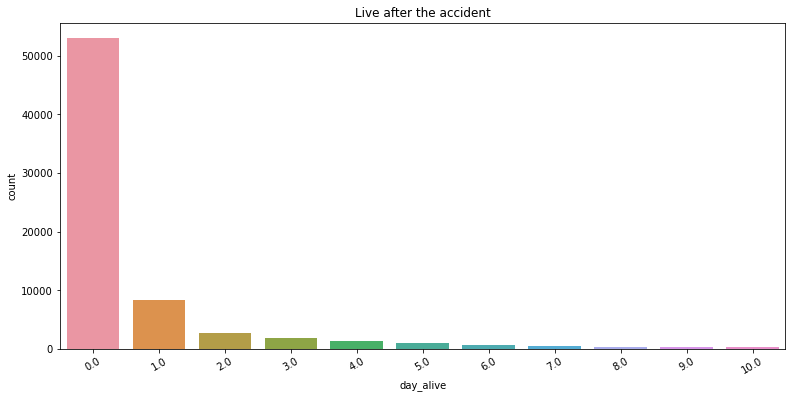

In [37]:
fig_dims = (13, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.countplot(x="day_alive", data=data[(data['day_alive']>=0) & (data['day_alive']<=10)], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

plt.title("Live after the accident")
plt.show()

## Range Age

In [32]:
def age_range(x) :
    for i in range(1,17) :
        left = int((i-1)*10)
        right = int((i*10)-1)
        if left <= x <= right :
            text = str(left) +' to ' + str(right)
            return text

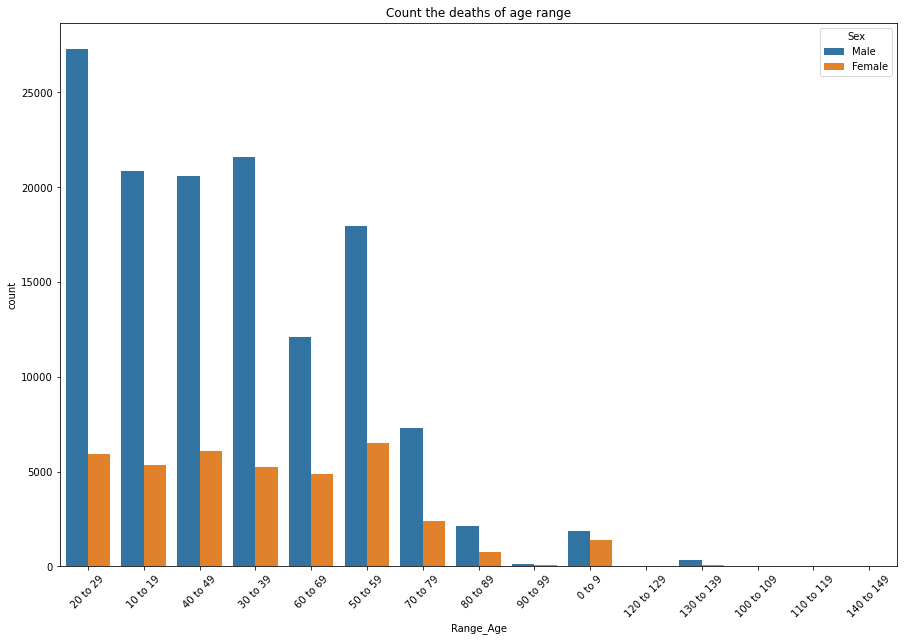

In [48]:
# Dangerous Age
# Sex 1 = male 
#     2 = Female
fig_dims = (15,10)
fig, ax = plt.subplots(figsize=fig_dims)

age_data = pd.DataFrame()
age_data['Age'] = data['Age'].apply(age_range)
age_data['Sex'] = data['Sex'].apply(lambda x:"Male" if x==1 else "Female")

g = sns.countplot(x="Age", hue='Sex', data=age_data, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

plt.xlabel("Range_Age")
plt.title("Count the deaths of age range")
plt.show()

# Vehicle behavior

In [55]:
# rename Vehicle column
vehicle_track = {"รถจักรยานยนต์":"Motorcycle",
                "รถอื่นๆ" : "Other",
                 "รถยนต์" : "Car",
                 "คนเดินเท้า" : "Pedestrian",
                 "รถบรรทุกขนาดเล็ก/รถตู้" : "Small trucks/vans",
                 "รถจักรยาน" : "Bicycle",
                 "รถบรรทุกหนัก" : "Big trucks",
                 "สามล้อ" : "Tuktuk",
                 "รถโดยสาร" : "Bus" ,
                 "รถเพื่อการเกษตร" : "Agricultural vehicles"
                }
data['Vehicle'] = data['Vehicle'].map(vehicle_track)

[Text(0, 0, 'Other'),
 Text(1, 0, 'Motorcycle'),
 Text(2, 0, 'Car'),
 Text(3, 0, 'Pedestrian'),
 Text(4, 0, 'Tuktuk'),
 Text(5, 0, 'Small trucks/vans'),
 Text(6, 0, 'Big trucks'),
 Text(7, 0, 'Bicycle'),
 Text(8, 0, 'Bus'),
 Text(9, 0, 'Agricultural vehicles')]

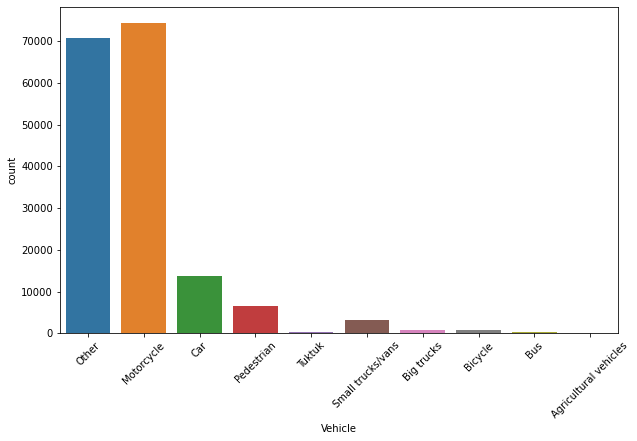

In [63]:
fix, ax = plt.subplots(figsize=(10,6))
g = sns.countplot(x='Vehicle', data=data, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=45)